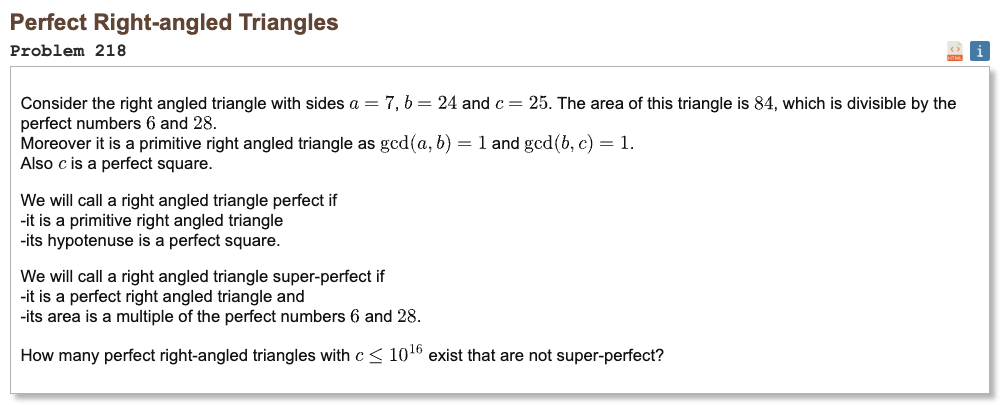

## Initial approach

* any primitive right triangle can be written as a = m^2 - n^2, b = 2mn, c = m^2 + n^2 with gcd(m,n)=1 and opposite parity
* a perfect triangle means c is a perfect square, so m^2 + n^2 is a square
* the area is A = ab/2 = mn(m^2 - n^2)
* mod 8 forces the even one of (m,n) to be a multiple of 4 when m^2 + n^2 is a square, so A is always divisible by 4
* mod 3 always gives one of m, n, (m^2 - n^2) divisible by 3, so A is always divisible by 3
* mod 7 plus the fact that m^2 + n^2 is a square implies m n (m^2 - n^2) is always 0 mod 7, so A is always divisible by 7
* therefore every perfect triangle has area divisible by 4·3·7 = 84, so every perfect triangle is automatically super-perfect

In [1]:
import math

def is_qr_mod(p, x):
    return pow(x % p, (p - 1) // 2, p) == 1 or x % p == 0

def lemma_mod8_force_multiple_of_4():
    for m in range(16):
        for n in range(16):
            if (m % 2) == (n % 2):
                continue
            s = (m * m + n * n) % 8
            if s != 1:
                continue
            even = m if m % 2 == 0 else n
            if even % 4 != 0:
                return False
    return True

def lemma_mod3_area_factor():
    for m in range(3):
        for n in range(3):
            if m == 0 and n == 0:
                continue
            prod = (m * n * ((m * m - n * n) % 3)) % 3
            if prod != 0:
                return False
    return True

def lemma_mod7_area_factor_given_square_sum():
    for m in range(7):
        for n in range(7):
            if m == 0 and n == 0:
                continue
            s = (m * m + n * n) % 7
            if not is_qr_mod(7, s):
                continue
            prod = (m * n * (m * m - n * n)) % 7
            if prod != 0:
                return False
    return True

def brute_sanity(limit_c):
    out = []
    m = 2
    while m * m + 1 <= limit_c:
        for n in range(1, m):
            if (m - n) % 2 == 0:
                continue
            if math.gcd(m, n) != 1:
                continue
            c = m * m + n * n
            if c > limit_c:
                continue
            r = int(math.isqrt(c))
            if r * r != c:
                continue
            a = m * m - n * n
            b = 2 * m * n
            A = (a * b) // 2
            out.append(A % 84)
        m += 1
    return all(x == 0 for x in out)

def solve():
    if not lemma_mod8_force_multiple_of_4():
        raise ValueError("mod 8 lemma failed")
    if not lemma_mod3_area_factor():
        raise ValueError("mod 3 lemma failed")
    if not lemma_mod7_area_factor_given_square_sum():
        raise ValueError("mod 7 lemma failed")
    if not brute_sanity(10**7):
        raise ValueError("sanity check failed")
    return 0

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 0
CPU times: user 459 ms, sys: 2.85 ms, total: 461 ms
Wall time: 461 ms
